<a href="https://colab.research.google.com/github/mrkhmath/CW1CSV/blob/main/Copy_of_CW!_F21AAPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Technology and Innovation in UAE**(Twitter Sentiment Analysis)

Objective


In [ ]:
import nltk
from nltk.corpus import wordnet
nltk.download("wordnet")
nltk.download('omw-1.4')
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from textblob import TextBlob

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# PART 1: Data Collection
In this section, we will use our twitter developer account to collect tweets from topic: 'Innovation and Technology in UAE' using built-in python library called 'tweepy'.

In [ ]:
# Importing the keys #
consumerKey = "7ZgYvwxMebYneq9UFu4XMuRfC"
consumerSecret = "3z0rruATWOUUXsWTT1no15VnxMzMgulISld4rlAMtRxUAN4WB2"
accessToken = "169414398-pCHBKhappRFQGFASGy32aFdGulhuMKlQ8eoVwH6F"
accessTokenSecret = "SV1lkSqYL2D93IMjIarKZwHJFtsQq4o3kxZGs6ooKoooI"

In [ ]:
# Establish the connection with API #
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:


search_keywords=["Technology UAE","Innovation UAE","Space UAE","G5 UAE","Telecommunication UAE","GITEX UAE","Artificial Intelligence UAE"]

new_tweets=[]
for keyword in search_keywords:
  new_tweets=new_tweets+api.search(q = keyword,tweet_mode='extended', count = 500 ,lang='en')


 


In [ ]:
# new_tweets = 
arr=[]
for tweet in new_tweets:
  arr.append([tweet.full_text])


In [ ]:
#Exporting tweets to a csv file for manual labeling
tweets_df=pd.DataFrame(arr,columns=['tweets'])
tweets_df.to_csv("ClassWork1.csv",header=True)
files.download("ClassWork1.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# PART 2: Data Labelling
We decided to use TextBlob to do initial labelling since we have a large number of tweets. TextBlob is a lexicon-based sentiment analyzer. TextBlob has rules that categorize a tweet with a range of negative to positive values.

Initially, we collected 170 tweets, we hand labelled them to negative/positive/neutral. this is attached with this notebook . We then ran TextBlob and compared our results.

As we are using TextBlob to label our data, task 1 and 2 of Part B of the coursework are combined in the upcoming cells. We defined a function that calculates polarity of a tweet using TextBlob, -ve polarity is labelled -1, +ve polarity is labelled 1 and tweets with polarity = 0 will be labelled 0.

Label	Description

 1.0	+ve tweet
-1.0  -ve tweet
0.0	neutral tweet



In [ ]:
#Importing the same dataset (hosted on Github) for labeling using TextBlob
importedData=pd.read_csv("https://raw.githubusercontent.com/mrkhmath/CW1CSV/main/ClassWork1.csv")


In [ ]:
# Labeling each tweet based on it's sentiment polarity using TextBlob
tweetPolarity=[]
tweetSubjectiviry=[]
positiveTweets=[]
negativeTweets=[]
for index in range(len(importedData)):
  tweet=(importedData.loc[index,"tweets"])
  if TextBlob(tweet).sentiment.polarity>0:
   tweetPolarity.append("Positive")
   positiveTweets.append(tweet)
  elif TextBlob(tweet).sentiment.polarity<0:
    tweetPolarity.append("Negative")
    negativeTweets.append(tweet)
  else:  
    tweetPolarity.append("Neutral")
  tweetSubjectiviry.append(TextBlob(tweet).sentiment.subjectivity)
importedData["label"]=tweetPolarity
importedData["Subjectivity"]=tweetSubjectiviry
importedData

,tweets,label,Subjectivity
0,RT @admediaoffice: In the latest episode of Ab...,Positive,0.900
1,RT @IndiaToday: The trilateral initiative will...,Neutral,0.000
2,RT @myDopamineApp: 🇦🇪 😎DOPAMINE x UAE😎🇦🇪\n\nHe...,Positive,0.600
3,RT @ipsdxb: Decentralized Finance (DeFi) - A r...,Neutral,0.000
4,The trilateral initiative will serve as a foru...,Neutral,0.000
...,...,...,...
249,Artificial Intelligence is going to the moon! ...,Negative,1.000
250,Artificial Intelligence is going to the moon! ...,Negative,1.000
251,Artificial Intelligence is going to the moon! ...,Negative,1.000
252,UAE's Lunar Rover Will Use Artificial Intellig...,Positive,0.875


# **Positive polarity tweets**






In [ ]:
pd.DataFrame(positiveTweets)

,0
0,RT @admediaoffice: In the latest episode of Ab...
1,RT @myDopamineApp: 🇦🇪 😎DOPAMINE x UAE😎🇦🇪\n\nHe...
2,In the latest episode of Abu Dhabi Sustainabil...
3,"RT @bsindia: India, France and the United Arab..."
4,"India, France and the United Arab Emirates on ..."
...,...
111,RT @gulf_news: UAE: 52 students become first g...
112,Mohamed bin Zayed University in #UAE graduates...
113,UAE: 52 students become first graduates of MBZ...
114,UAE's Lunar Rover Will Use Artificial Intellig...


In [ ]:
# Defining a function to calculate the percentage 
def percentage(p,w):
  return (p*100/w)

In [ ]:
# Calculating the percentage of each type of polarity 
positive=percentage(len(pd.DataFrame(positiveTweets)),len(importedData))
negative=percentage(len(pd.DataFrame(negativeTweets)),len(importedData))
neutral=100-(positive+negative)


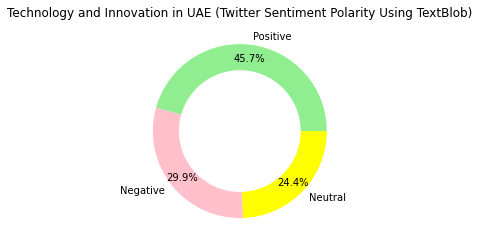

In [ ]:
# Representing Polarity in a Dounght Chart
PolarityTypes=["Positive","Negative","Neutral"]
values=[positive,negative,neutral]
colors = ['lightgreen', 'pink', 'yellow']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(values, colors=colors, labels=PolarityTypes,
        autopct='%1.1f%%', pctdistance=0.85)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Technology and Innovation in UAE (Twitter Sentiment Polarity Using TextBlob)')
  
# Displaying Chart
plt.show()
